<a href="https://colab.research.google.com/github/peter000815/BA0815/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded_files = files.upload()

Saving sentiment_analysis.csv to sentiment_analysis.csv


In [2]:

# Web Scraping
import requests
from bs4 import BeautifulSoup

# Preprocess
import spacy
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd

# EDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
all_books = pd.read_csv('sentiment_analysis.csv')
all_books

,timestamp,tweet_text,all_hashtags,followers_count,sentaiment_score
0,7/21/20 23:47,b'America has over 1000 deaths today... #cov...,"['covid19vaccine', 'covid19India', 'Covid_19',...",272,0.000000
1,7/21/20 23:28,b'#Trump: no leadership + ignores the science ...,"['Trump', 'US', 'COVID19', 'USA', 'coronavirus...",546,0.050000
2,7/21/20 23:10,b'If \xe2\x80\x9cyou sound about as stupid as ...,"['CoronavirusUSA', 'TrumpPressConference', 'Tu...",515,-0.200000
3,7/21/20 23:03,b'Sounds about right. #TrumpIsAMonster #Trum...,"['TrumpIsAMonster', 'TrumpIsANationalDisgrace'...",13810,0.285714
4,7/21/20 23:00,"b'On #COVID19, health care industry leaders ar...","['COVID19', 'CoronavirusUSA']",8560,0.500000
...,...,...,...,...,...
2998,2007/8/20 0:17,b'#Coronavirus cases continue to surge. \xe2\x...,"['Coronavirus', 'COVIDー19', 'COVID__19', 'Covi...",7465,0.000000
2999,2007/8/20 0:17,b'#UPDATE #CoronavirusUSA New one-day U.S. re...,"['UPDATE', 'CoronavirusUSA', 'COVID19', 'coron...",296,0.054545
3000,2007/8/20 0:16,b'COVIDIOT PRESIDENTS NEED TO PIVOT-CRISIS #...,"['PoeticAnagramWave', 'SixWordStory', 'Coronav...",37,0.000000
3001,2007/8/20 0:11,b'Deaths per million from the COVID-19 in U.S....,"['COVID19', 'SARSCoV2', 'Coronavirus', 'Corona...",36,0.000000


In [6]:
all_books['token'] = all_books['tweet_text'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])
sid = SentimentIntensityAnalyzer()
all_books['scores sentiment'] = all_books['tweet_text'].apply(lambda x: sid.polarity_scores(x))
all_books

,timestamp,tweet_text,all_hashtags,followers_count,sentaiment_score,token,scores sentiment
0,7/21/20 23:47,b'America has over 1000 deaths today... #cov...,"['covid19vaccine', 'covid19India', 'Covid_19',...",272,0.000000,"[has, over, deaths, today, coronavirusuk, Coro...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,7/21/20 23:28,b'#Trump: no leadership + ignores the science ...,"['Trump', 'US', 'COVID19', 'USA', 'coronavirus...",546,0.050000,"[b, Trump, no, leadership, ignores, the, scien...","{'neg': 0.179, 'neu': 0.773, 'pos': 0.048, 'co..."
2,7/21/20 23:10,b'If \xe2\x80\x9cyou sound about as stupid as ...,"['CoronavirusUSA', 'TrumpPressConference', 'Tu...",515,-0.200000,"[sound, about, as, stupid, as, you, were, a, p...","{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp..."
3,7/21/20 23:03,b'Sounds about right. #TrumpIsAMonster #Trum...,"['TrumpIsAMonster', 'TrumpIsANationalDisgrace'...",13810,0.285714,"[about, right, TrumpIsAMonster, TrumpIsANation...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,7/21/20 23:00,"b'On #COVID19, health care industry leaders ar...","['COVID19', 'CoronavirusUSA']",8560,0.500000,"[health, care, industry, leaders, are, more, p...","{'neg': 0.155, 'neu': 0.667, 'pos': 0.178, 'co..."
...,...,...,...,...,...,...,...
2998,2007/8/20 0:17,b'#Coronavirus cases continue to surge. \xe2\x...,"['Coronavirus', 'COVIDー19', 'COVID__19', 'Covi...",7465,0.000000,"[b, Coronavirus, cases, continue, to, surge, s...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2999,2007/8/20 0:17,b'#UPDATE #CoronavirusUSA New one-day U.S. re...,"['UPDATE', 'CoronavirusUSA', 'COVID19', 'coron...",296,0.054545,"[b, UPDATE, CoronavirusUSA, New, record, in, n...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3000,2007/8/20 0:16,b'COVIDIOT PRESIDENTS NEED TO PIVOT-CRISIS #...,"['PoeticAnagramWave', 'SixWordStory', 'Coronav...",37,0.000000,"[PRESIDENTS, NEED, TO, PoeticAnagramWave, SixW...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3001,2007/8/20 0:11,b'Deaths per million from the COVID-19 in U.S....,"['COVID19', 'SARSCoV2', 'Coronavirus', 'Corona...",36,0.000000,"[per, million, from, the, in, States, District...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [7]:
df_all = all_books
df_all

,timestamp,tweet_text,all_hashtags,followers_count,sentaiment_score,token,scores sentiment
0,7/21/20 23:47,b'America has over 1000 deaths today... #cov...,"['covid19vaccine', 'covid19India', 'Covid_19',...",272,0.000000,"[has, over, deaths, today, coronavirusuk, Coro...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,7/21/20 23:28,b'#Trump: no leadership + ignores the science ...,"['Trump', 'US', 'COVID19', 'USA', 'coronavirus...",546,0.050000,"[b, Trump, no, leadership, ignores, the, scien...","{'neg': 0.179, 'neu': 0.773, 'pos': 0.048, 'co..."
2,7/21/20 23:10,b'If \xe2\x80\x9cyou sound about as stupid as ...,"['CoronavirusUSA', 'TrumpPressConference', 'Tu...",515,-0.200000,"[sound, about, as, stupid, as, you, were, a, p...","{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp..."
3,7/21/20 23:03,b'Sounds about right. #TrumpIsAMonster #Trum...,"['TrumpIsAMonster', 'TrumpIsANationalDisgrace'...",13810,0.285714,"[about, right, TrumpIsAMonster, TrumpIsANation...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,7/21/20 23:00,"b'On #COVID19, health care industry leaders ar...","['COVID19', 'CoronavirusUSA']",8560,0.500000,"[health, care, industry, leaders, are, more, p...","{'neg': 0.155, 'neu': 0.667, 'pos': 0.178, 'co..."
...,...,...,...,...,...,...,...
2998,2007/8/20 0:17,b'#Coronavirus cases continue to surge. \xe2\x...,"['Coronavirus', 'COVIDー19', 'COVID__19', 'Covi...",7465,0.000000,"[b, Coronavirus, cases, continue, to, surge, s...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2999,2007/8/20 0:17,b'#UPDATE #CoronavirusUSA New one-day U.S. re...,"['UPDATE', 'CoronavirusUSA', 'COVID19', 'coron...",296,0.054545,"[b, UPDATE, CoronavirusUSA, New, record, in, n...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3000,2007/8/20 0:16,b'COVIDIOT PRESIDENTS NEED TO PIVOT-CRISIS #...,"['PoeticAnagramWave', 'SixWordStory', 'Coronav...",37,0.000000,"[PRESIDENTS, NEED, TO, PoeticAnagramWave, SixW...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3001,2007/8/20 0:11,b'Deaths per million from the COVID-19 in U.S....,"['COVID19', 'SARSCoV2', 'Coronavirus', 'Corona...",36,0.000000,"[per, million, from, the, in, States, District...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [8]:
df_all['token'] = df_all['tweet_text'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])

# after remove stopwords and stemmer
stop = stopwords.words('english')
porter_stemmer = PorterStemmer()
df_all['clean token'] = df_all['token'].apply(lambda x: [item for item in x if item not in stop_words])\
.apply(lambda x: [porter_stemmer.stem(item) for item in x])
df_all.head(15)

,timestamp,tweet_text,all_hashtags,followers_count,sentaiment_score,token,scores sentiment,clean token
0,7/21/20 23:47,b'America has over 1000 deaths today... #cov...,"['covid19vaccine', 'covid19India', 'Covid_19',...",272,0.000000,"[has, over, deaths, today, coronavirusuk, Coro...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","[death, today, coronavirusuk, coronavirusupd, ..."
1,7/21/20 23:28,b'#Trump: no leadership + ignores the science ...,"['Trump', 'US', 'COVID19', 'USA', 'coronavirus...",546,0.050000,"[b, Trump, no, leadership, ignores, the, scien...","{'neg': 0.179, 'neu': 0.773, 'pos': 0.048, 'co...","[b, trump, leadership, ignor, scienc, divid, p..."
2,7/21/20 23:10,b'If \xe2\x80\x9cyou sound about as stupid as ...,"['CoronavirusUSA', 'TrumpPressConference', 'Tu...",515,-0.200000,"[sound, about, as, stupid, as, you, were, a, p...","{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...","[sound, stupid, person, coronavirususa, trumpp..."
3,7/21/20 23:03,b'Sounds about right. #TrumpIsAMonster #Trum...,"['TrumpIsAMonster', 'TrumpIsANationalDisgrace'...",13810,0.285714,"[about, right, TrumpIsAMonster, TrumpIsANation...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","[right, trumpisamonst, trumpisanationaldisgrac..."
4,7/21/20 23:00,"b'On #COVID19, health care industry leaders ar...","['COVID19', 'CoronavirusUSA']",8560,0.500000,"[health, care, industry, leaders, are, more, p...","{'neg': 0.155, 'neu': 0.667, 'pos': 0.178, 'co...","[health, care, industri, leader, pessimist, go..."
5,7/21/20 22:58,"b""@PressSec @realDonaldTrump China virus... su...","['DerangedDonald', 'IdiotInChief', 'Coronaviru...",98,0.023333,"[b, PressSec, realDonaldTrump, China, virus, s...","{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...","[b, presssec, realdonaldtrump, china, viru, ea..."
6,7/21/20 22:28,"b'(Thread) The issue of schools reopening, w/o...","['CoronavirusUSA', 'CorruptGOP', 'SchoolsReope...",745,-0.262857,"[b, Thread, The, issue, of, schools, reopening...","{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp...","[b, thread, the, issu, school, reopen, actual,..."
7,7/21/20 22:12,"b""Oh c'mon @Newshour &gt; interviewing GA GOP ...","['COVID19', 'media', 'CoronaVirusUSA']",639,-0.425000,"[b, Oh, Newshour, gt, interviewing, GA, GOP, S...","{'neg': 0.188, 'neu': 0.697, 'pos': 0.116, 'co...","[b, Oh, newshour, gt, interview, GA, gop, sena..."
8,7/21/20 22:09,b'\xe2\x80\x9cWhether you like the mask or not...,"['maskup', 'COVID19', 'CoronavirusUSA']",11,-0.095833,"[you, like, the, mask, or, not, they, have, a,...","{'neg': 0.099, 'neu': 0.809, 'pos': 0.092, 'co...","[like, mask, real, realdonaldtrump, damn, time..."
9,7/21/20 22:08,b'WELL THIS SUCKS #COVID19 #CoronavirusUSA #co...,"['COVID19', 'CoronavirusUSA', 'coronavirus', '...",312,-0.300000,"[THIS, SUCKS, CoronavirusUSA, coronavirus, Wea...","{'neg': 0.288, 'neu': 0.712, 'pos': 0.0, 'comp...","[thi, suck, coronavirususa, coronaviru, wearad..."


In [18]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [19]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df_all['tweet_text'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

,'a,'all,'blood,'careless,'coffin,'covid,'d,'do,'everyon,'fake,'hoax,'hype,'i,'incap,'it,'li,'like,'ll,'m,'most,'nazi,'nice,'no,'not,'one,'peopl,'perfect,'person,'plagu,'re,'recent,'red,'rona,'s,'scienc,'serious,'terrifi,'the,'there,'they,...,youabouttoloseyojob,youknowwhat,youlikedata,young,younger,youngest,younglivesmatt,younhid,your,yourhealth,yourself,yourself-coronaviru,yourselv,yousuck,youth,youthcamp,youthsport,youtub,youtubechannel,yr,ysjagan,yt,zaintse,zealand,zealot,zeenew,zelenko,zero,zero\xe2\x80\x99,zinc,zombi,zombieapocalyps,zone,zone\xe2\x80\x9d,zoo,zoom,zoombackground,zoonot,zorro,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=True)
matrix = vec.fit_transform(df_all['tweet_text'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,'a,'all,'blood,'careless,'coffin,'covid,'d,'do,'everyon,'fake,'hoax,'hype,'i,'incap,'it,'li,'like,'ll,'m,'most,'nazi,'nice,'no,'not,'one,'peopl,'perfect,'person,'plagu,'re,'recent,'red,'rona,'s,'scienc,'serious,'terrifi,'the,'there,'they,...,you\xe2\x80\x99v,you\xe2\x80\x9d,youabouttoloseyojob,youknowwhat,youlikedata,young,younger,youngest,younglivesmatt,younhid,yourhealth,yourself-coronaviru,yourselv,yousuck,youth,youthcamp,youthsport,youtub,youtubechannel,yr,ysjagan,yt,zaintse,zealand,zealot,zeenew,zelenko,zero,zero\xe2\x80\x99,zinc,zombi,zombieapocalyps,zone,zone\xe2\x80\x9d,zoo,zoom,zoombackground,zoonot,zorro,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(matrix) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)

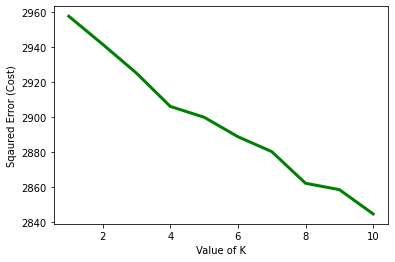

In [23]:
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot

In [10]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(df_all.tweet_text)
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
print(X_tfidf.shape)

(3003, 12432)


In [24]:
random_state = 666
cls = MiniBatchKMeans(n_clusters=4, random_state=random_state)
cls.fit(X_tfidf)
cls.predict(X_tfidf)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [25]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X_tfidf.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

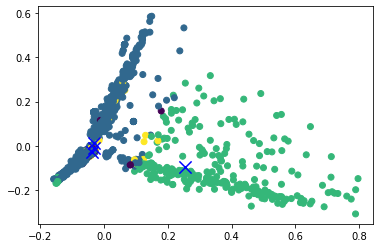

In [26]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(X_tfidf))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')